# Time Series

![Clocks](https://media.giphy.com/media/xTiTnEeKtzw4zJyFsQ/giphy.gif)

In [7]:

# 1. Linear relationship between target and predictors
# 2. No multicollinearity
# 3. Errors are normally distributed
# 4. Homoscedasticity of target w.r.t. the range of predictors (residuals show no patterns)
# 5. No autocorrelation between records

<a id='section_1'></a>

# Time Series vs. Linear

For linear regression, we attempted to explain the variance of a continuous target variable via a set of **independent predictor features**. We assumed that there was no **autocorrelation** amongst our records.  Whereas multicolinearity describes two features whose linear increase or decrease is correlated,  autocorrelation describes whether there is a relationship between values of the same variable at different times.   


In linear regression, we make the assumption that each record is independent of the others.  In time series models, we make the opposite assumption.  We assume that a given value can best be predicted by its **past values**.

The main idea with time series is to replace our independent features with past values of our target. 

The models we will cover in lecture include endogenous variables.
<em>Endogenous</em> means caused by factors within the system. 

<em>Exogenous</em>, caused by factors outside the system. 

Many statsmodels tools use <tt>endog</tt> to represent the incoming time series data in place of the constant <tt>y</tt>.<br>

For more information visit http://www.statsmodels.org/stable/endog_exog.html

# Applications
> informed by [Practical Time Series Analysis](https://www.oreilly.com/library/view/practical-time-series/9781492041641/), Nielson)


## Healthcare
> With new methods of personalized data collection, the opportunity for time series analysis is growing.  Take health care,  where new wearable technology is producing individualized records of medical data. With a smartwatch or phone, heartrate, bloodpressure, sleep and activity records, can all be recorded easily. All of these datapoints can be timestamped precisely, and easily exported for analysis.  

> Time series are used to predict weekly flu rates

## Finance
> High frequency traders use large quantities to train time series models that trade on the microsecond level. 
> Long term time series look to model over longer periods (hours, days, months) are still relevant and employed by traditional trading firms.

## Government
> Government databases, which serve an important purpose of gathering data related to the wellfare of its citizens, are a rich source for time series data.  These databases contain time series related to:
   - Unemployment
   - Global warming
   - Crime (gun crime will be the example of today's lessons)

## A few examples visualized


## Agenda

1. [Date Time Objects](#section_2)
2. [Time Series Preprocessing Techniques](#section_3)
 - [Resampling](#resampling)
 - [Interpolating](#interpolation)
4. [Components of Time Series Data and Stationarity](#components)
 - [Decomposition](#decomposition)
 - [Stationarity](#stationarity)
 - [Dickey-Fuller](#dickey-fuller)
    

<a id='section_2'></a>

# 1: Datetime objects

Datetime objects make our time series modeling lives easier.  They will allow us to perform essential data prep tasks with a few lines of code.  

We need our time series **index** to be datetime objects, since our models will rely on being able to identify the previous chronological value.

There is a datetime [library](https://docs.python.org/2/library/datetime.html), and inside pandas there is a datetime module as well as a to_datetime() function.


Let's import some data on **gun violence in Chicago**.

[source](https://data.cityofchicago.org/Public-Safety/Gun-Crimes-Heat-Map/iinq-m3rg)

In [9]:
ts = pd.read_csv('data/Gun_Crimes_Heat_Map.csv')

Let's look at some summary stats:

In [13]:
ts['Description'].value_counts()

AGGRAVATED: HANDGUN                              26622
ARMED: HANDGUN                                   22813
UNLAWFUL POSS OF HANDGUN                         19131
AGGRAVATED - HANDGUN                              3124
RECKLESS FIREARM DISCHARGE                        2944
UNLAWFUL USE HANDGUN                              2396
ATTEMPT: ARMED-HANDGUN                            1996
UNLAWFUL POSSESSION - HANDGUN                     1413
ARMED - HANDGUN                                    995
AGGRAVATED: OTHER FIREARM                          673
UNLAWFUL POSS OTHER FIREARM                        611
POSS FIREARM/AMMO:NO FOID CARD                     454
UNLAWFUL USE OTHER FIREARM                         405
ARMED: OTHER FIREARM                               302
AGGRAVATED PO: HANDGUN                             294
UNLAWFUL USE - HANDGUN                             260
AGG PRO.EMP: HANDGUN                               182
ATTEMPT ARMED - HANDGUN                            102
UNLAWFUL U

In [16]:
ts.Domestic.value_counts()[1]/len(ts)

0.04698183353466171

In [19]:
arrest_rate = ts['Arrest'].value_counts()[1]/len(ts)

The data extracts the year of offense as its own columns.

While this does show some interesting information that will be relevant to our time series analysis, we are going to get more granular.

# Date Time Objects

For time series modeling, the first step is to make sure that the index is a date time object.

There are a few ways to **reindex** our series to datetime. 

We can use the pd.to_datetime() method

In [24]:
ts.set_index(pd.to_datetime(ts['Date']), drop=True, inplace=True)

Or, we can parse the dates directly on import

We've covered some of the fun abilities of datetime objects, including being able to extract components of the date like so:

In [28]:
ts.index[0].month

2

In [30]:
ts.index[0].year

2018

In [32]:
ts.index?

Type:        DatetimeIndex
String form:
DatetimeIndex(['2018-02-10 08:00:00', '2016-06-20 22:18:00',
           '2015-06-11 20:28:00' <...> 015-03-17 23:15:00'],
           dtype='datetime64[ns]', name='Date', length=85267, freq=None)
Length:      85267
File:        ~/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/datetimes.py
Docstring:  
Immutable ndarray of datetime64 data, represented internally as int64, and
which can be boxed to Timestamp objects that are subclasses of datetime and
carry metadata such as frequency information.

Parameters
----------
data : array-like (1-dimensional), optional
    Optional datetime-like data to construct index with.
copy : bool
    Make a copy of input ndarray.
freq : str or pandas offset object, optional
    One of pandas date offset strings or corresponding objects. The string
    'infer' can be passed in order to set the frequency of the index as the
    inferred frequency upon creation.
tz : pytz.timezone or dateutil.tz.tzfile
ambig

We can easily see now see whether offenses happen, for example, during business hours.


### With a partner, take five minutes ot play around with the datetime object, and make a plot that answers a time based question about our data.

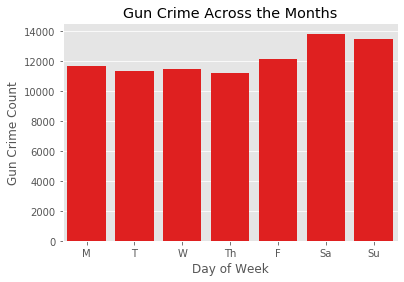

In [36]:
ts['dow'] = ts.index

# 0 aligns with Monday
ts['dow'] = ts.dow.apply(lambda x: x.dayofweek)

x = ts.dow.value_counts(sort=False).index

height = ts.dow.value_counts(sort=False)

fig, ax = plt.subplots()

sns.barplot(x, height, color='r', ax=ax)
ax.set_title('Gun Crime Across the Months')
ax.set_ylabel('Gun Crime Count')
ax.set_xlabel('Day of Week')
ax.set_xticklabels(['M', 'T', 'W', 'Th', 'F', 'Sa', 'Su']);

Text(0.5, 0, 'Quarter')

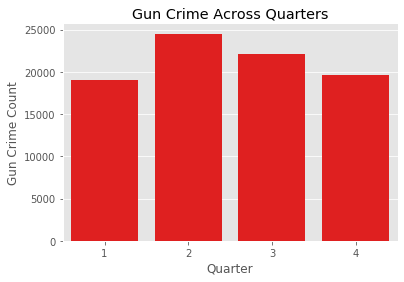

In [38]:
ts['quarter'] = ts.index
ts['quarter'] = ts.quarter.apply(lambda x: x.quarter)

x = ts.quarter.value_counts(sort=False).index

height = ts.quarter.value_counts(sort=False)

fig, ax = plt.subplots()

sns.barplot(x, height, color='r', ax=ax)
ax.set_title('Gun Crime Across Quarters')
ax.set_ylabel('Gun Crime Count')
ax.set_xlabel('Quarter')


Text(0.5, 0, 'Month')

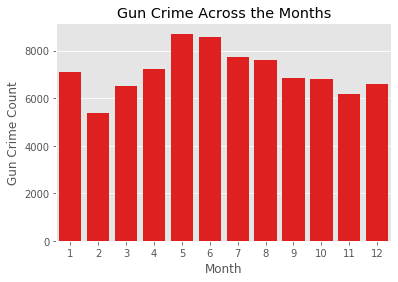

In [40]:
ts['month'] = ts.index
ts['month'] = ts.month.apply(lambda x: x.month)


x = ts.month.value_counts(sort=False).index

height = ts.month.value_counts(sort=False)

fig, ax = plt.subplots()

sns.barplot(x, height, color='r', ax=ax)
ax.set_title('Gun Crime Across the Months')
ax.set_ylabel('Gun Crime Count')
ax.set_xlabel('Month')

![pair](https://media.giphy.com/media/SvulfW0MQncFYzQEMT/giphy.gif)

<a id='section_3'></a>

# 2: Time Series Preprocessing Techniques

<a id='resampling'></a>

## Resampling
We have new abilities associated with the datetime index, such as **resampling**

Resampling allows us to zoom in on or zoom out from the time specification associated with data collection.

For example, our gun data is collected with a time stamp including the minute of the incident.  Of course, we will not be interested in predicting the minute a gun crime occured, so we will eventually zoom out from our data.  


Take a moment to familiarize yourself with the difference between resampling aliases

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

**To upsample** is to increase the frequency of the data of interest.  
**To downsample** is to decrease the frequency of the data of interest.

Let's downsample, and create a time series of gun offenses reported per day. 

In [42]:
ts.resample('D')

When resampling, we have to provide a rule to resample by, and an **aggregate function**.

For our purposes, we will downsample, and  count the number of occurences per day.

In [44]:
ts.resample('D').count()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Year,Updated On,Latitude,Longitude,Location,hour,business_hours,dow,quarter,month
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
2014-01-02,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
2014-01-03,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
2014-01-04,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
2014-01-05,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-21,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
2020-06-22,66,66,66,66,66,66,66,66,66,66,...,66,66,66,66,66,66,66,66,66,66
2020-06-23,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48


Our time series will consist of a series of counts of gun reports per day.

In [46]:
ts_day = ts.resample('D').count()['ID']

Let's visualize our timeseries with a plot.

There seems to be some abnormal activity happening towards the end of our series.

**[sun-times](https://chicago.suntimes.com/crime/2020/6/8/21281998/chicago-deadliest-day-violence-murder-history-police-crime)**

Let's treat the span of days from 5-31 to 6-03 as outliers. 

There are several ways to do this, but let's first remove the outliers, and populate an an empty array with the original date range.  That will introduce us to the pd.date_range method.

Let's zoom in on that week again

The datetime object allows us several options of how to fill those gaps:

# Forward Fill

A simple way to deal with the missing data is to simply roll forward the most recent entry prior to the gap.

In [55]:
# Forward Fill
# Take the date range above and call the ffill() method
ts_day[(ts_day.index > '2020-05-20') 
                 & (ts_day.index < '2020-06-07')].ffill()

2020-05-21    46.0
2020-05-22    48.0
2020-05-23    68.0
2020-05-24    77.0
2020-05-25    77.0
2020-05-26    56.0
2020-05-27    47.0
2020-05-28    58.0
2020-05-29    54.0
2020-05-30    51.0
2020-05-31    51.0
2020-06-01    51.0
2020-06-02    51.0
2020-06-03    51.0
2020-06-04    64.0
2020-06-05    60.0
2020-06-06    59.0
Freq: D, dtype: float64

## Backward Fill

We can also fill backward, but doing so is more risky, since you are incorporating future information into prior data.  This is a so-called **lookahead**, which is a type of time series data leakage.  If we backfill, we would expect our models to perform unreasonably well predicting data points whose previous values have been backfilled.

In [58]:
ts_day[(ts_day.index > '2020-05-20') 
                 & (ts_day.index < '2020-06-07')].bfill()

2020-05-21    46.0
2020-05-22    48.0
2020-05-23    68.0
2020-05-24    77.0
2020-05-25    56.0
2020-05-26    56.0
2020-05-27    47.0
2020-05-28    58.0
2020-05-29    54.0
2020-05-30    51.0
2020-05-31    64.0
2020-06-01    64.0
2020-06-02    64.0
2020-06-03    64.0
2020-06-04    64.0
2020-06-05    60.0
2020-06-06    59.0
Freq: D, dtype: float64

<a id='interpolation'></a>

# Interpolate 
Fills the values according to a specified method. The default linear, assumes the data area evenly spaced along the line connecting the real values surrounding the NaN values.

In [61]:
ts_day[(ts_day.index > '2020-05-20') 
                 & (ts_day.index < '2020-06-07')].interpolate()

2020-05-21    46.0
2020-05-22    48.0
2020-05-23    68.0
2020-05-24    77.0
2020-05-25    66.5
2020-05-26    56.0
2020-05-27    47.0
2020-05-28    58.0
2020-05-29    54.0
2020-05-30    51.0
2020-05-31    53.6
2020-06-01    56.2
2020-06-02    58.8
2020-06-03    61.4
2020-06-04    64.0
2020-06-05    60.0
2020-06-06    59.0
Freq: D, dtype: float64

<a id='components'></a>

## Components of Time Series Data
A time series in general is supposed to be affected by four main components, which can be separated from the observed data. These components are: *Trend, Cyclical, Seasonal and Irregular* components.

- **Trend** : The long term movement of a time series. For example, series relating to population growth, number of houses in a city etc. show upward trend.
- **Seasonality** : Fluctuation in the data set that follow a regular pattern due to outside influences. For example sales of ice-cream increase in summer, or daily web traffic.
- **Cyclical** : When data exhibit rises and falls that are not of fixed period.  Think of business cycles which usually last several years, but where the length of the current cycle is unknown beforehand.
- **Irregular**: Are caused by unpredictable influences, which are not regular and also do not repeat in a particular pattern. These variations are caused by incidences such as war, strike, earthquake, flood, revolution, etc. There is no defined statistical technique for measuring random fluctuations in a time series.


*Note: Many people confuse cyclic behaviour with seasonal behaviour, but they are really quite different. If the fluctuations are not of fixed period then they are cyclic; if the period is unchanging and associated with some aspect of the calendar, then the pattern is seasonal.*

We can use the seasonal_decompose function to show trends the components of our time series.

Our modeling will aim to predict the weekly gun crime counts.
We will treat the outliers with interpolated interpolation.

In [82]:
ts_weekly = ts_int.resample('W').mean()

<a id='decomposition'></a>

We can also get a sense of the patterns in our data using **smoothing**. Noise makes it difficult to see patterns in our time series. Smoothing techniques to see the patterns more clearly.

Common smoothing techniques are simple moving averages and exponentially weighted moving averages.  

 - Simple moving average simply calculates the average of a specified number of points close to the point in question.
 - Exponentially weighted average does the same thing, but gives more weight to points closer in time.

We can call the rolling function plus an aggregate (mean) to calculate the simple moving average.

In [85]:
ts_weekly.rolling(16).mean()

2014-01-05          NaN
2014-01-12          NaN
2014-01-19          NaN
2014-01-26          NaN
2014-02-02          NaN
2014-02-09          NaN
2014-02-16          NaN
2014-02-23          NaN
2014-03-02          NaN
2014-03-09          NaN
2014-03-16          NaN
2014-03-23          NaN
2014-03-30          NaN
2014-04-06          NaN
2014-04-13          NaN
2014-04-20    22.208929
2014-04-27    22.178571
2014-05-04    22.848214
2014-05-11    23.258929
2014-05-18    23.705357
2014-05-25    24.258929
2014-06-01    25.133929
2014-06-08    25.964286
2014-06-15    27.098214
2014-06-22    28.142857
2014-06-29    29.071429
2014-07-06    29.991071
2014-07-13    30.589286
2014-07-20    31.375000
2014-07-27    31.848214
2014-08-03    31.901786
2014-08-10    31.776786
2014-08-17    31.830357
2014-08-24    31.812500
2014-08-31    31.696429
2014-09-07    31.285714
2014-09-14    30.857143
2014-09-21    30.723214
2014-09-28    31.169643
2014-10-05    31.000000
2014-10-12    30.375000
2014-10-19    30

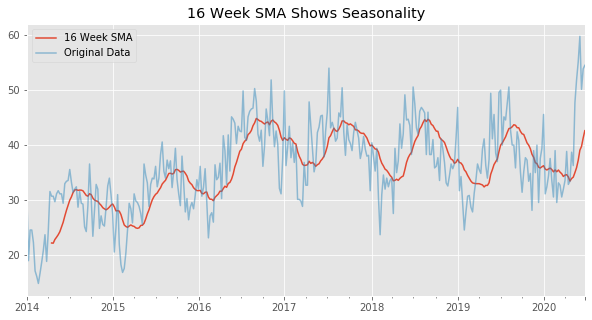

In [87]:

fig, ax = plt.subplots(figsize=(10,5))

ts_weekly.rolling(16).mean().plot(ax=ax, label='16 Week SMA')
ts_weekly.plot(ax=ax, alpha=.5, label='Original Data')
ax.set_title("16 Week SMA Shows Seasonality")
ax.legend();

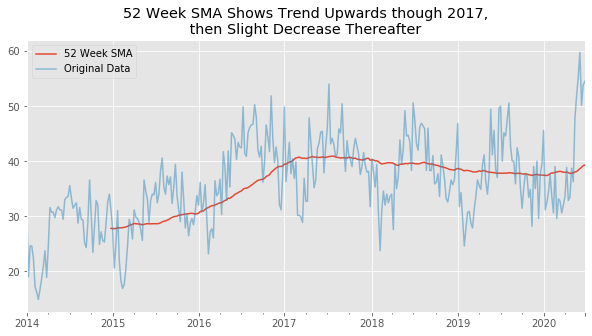

In [89]:
fig, ax = plt.subplots(figsize=(10,5))

ts_weekly.rolling(52).mean().plot(ax=ax, label='52 Week SMA')
ts_weekly.plot(ax=ax, alpha=.5, label='Original Data')
ax.set_title("52 Week SMA Shows Trend Upwards though 2017,\n then Slight Decrease Thereafter ")
ax.legend();

<a id='stationarity'></a>

### Statistical stationarity: 

When building our models, we will want to account for these trends somehow.  Time series whose mean and variance have trends across time will be difficult to predict out into the future. 

A **stationary time series** is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. A stationarized series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past!  


<h3 style="text-align: center;">Constant Mean</p>



<img src='img/mean_nonstationary.webp'/>

<h3 style="text-align: center;">Constant Variance</p>


<img src='img/variance_nonstationary.webp'/>


<h3 style="text-align: center;">Constant Covariance</p>


<img src='img/covariance_nonstationary.webp'/>

While we can get a sense of how stationary our data is with visuals, the Dickey Fuller test gives us a quantitatitive measure.

Here the null hypothesis is that the TS is non-stationary. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

As we concluded visually, our original timeseries does not pass the test of stationarity.

### How to stationarize time series data

A series of steps can be taken to stationarize your data - also known -  as removing trends (linear trends, seasonaility/periodicity, etc - more details on transformations <a href='http://people.duke.edu/~rnau/whatuse.htm'>here</a>).


One way to remove trends is to difference our data.  
Differencing is performed by subtracting the previous observation (lag=1) from the current observation, thereby creating a timeseries of differences.  

In [95]:
ts_weekly.diff().dropna()[:5]

2014-01-12   -12.200000
2014-01-19     5.571429
2014-01-26     0.000000
2014-02-02    -2.285714
2014-02-09    -5.142857
Freq: W-SUN, dtype: float64

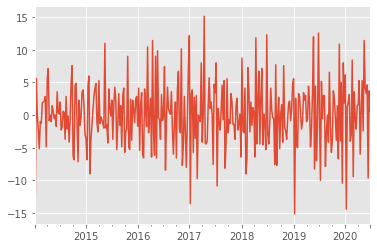

In [97]:
ts_weekly.diff().dropna().plot()

Sometimes, we have to difference the differenced data (known as a second difference) to achieve stationary data. <b>The number of times we have to difference our data is the order of differencing</b> - we will use this information when building our model.

<a id='dickey-fuller'></a>

Let's difference our data and see if it improves Dickey-Fuller Test

One we have achieved stationarity the next step in fitting a model to address any autocorrelation that remains in the differenced series. 

Sometimes, we have to difference the differenced data (known as a second difference) to achieve stationary data. <b>The number of times we have to difference our data is the order of differencing</b> - we will use this information when building our model.

One we have achieved stationarity the next step in fitting a model is to address any autocorrelation that remains in the differenced series. 